In [1]:
import pandas as pd
import yaml 
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid.inset_locator import inset_axes


from pylab import *

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd
import glob, os, pprint as pp
import seaborn as sns


with open("conf.yaml") as f:
    conf = yaml.load(f, Loader = yaml.FullLoader)
    
scales_values = conf["scales_values"]

out_path = conf["out_path"]
out_path = os.path.join(out_path,"scenario/mix/50/")
out_path

<ipython-input-1-f3c625dacf50>:10: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


'../output/coverage/scenario/mix/50/'

### Getting all our coverage filenames from the data path

In [ ]:
names =[os.path.basename(file) for file in glob.glob(out_path+"*.csv")]
pp.pprint(names)
print(len(names)) #expected: 9

for name in names:
    print(name.split("_"))

# Plot coverage map 
- 3D and heatmaps

In [ ]:
sns.set(style="ticks",font_scale=2)

for name in names:
    print("processing",out_path+name)
    nameparts = name.split("_")
    basetitle =nameparts[0] + ", lambda set to " + nameparts[1]
    
    data = pd.read_csv(out_path + name)
    path = Path(out_path + name)
    numcols, numrows = 10000, 10000

    fig = plt.figure(figsize=(15,15))
    ax = fig.gca(projection='3d')

    xi = np.linspace(data.lon.min(), data.lon.max(), numrows)
    yi = np.linspace(data.lat.min(), data.lat.max(), numcols)

    #print(xi, yi)

    xi, yi = np.meshgrid(xi, yi)

    #print(xi, yi)

    x, y, z = data.lon, data.lat, data.probability

    #print(x, y, z)

    # known points (long, lat)
    points = np.vstack((x,y)).T 
    # known z points
    values = z
    # all the points I want to interpolate
    wanted = (xi, yi)
    # meshgrid interpolated
    zi = griddata(points, values, wanted,method="linear", fill_value = 0) 

    surf = ax.plot_surface(xi, yi, zi, cmap=cm.Reds,
                           linewidth=0, antialiased=False,shade=True)

    ax.set_zlim(0, 1)
    #ax.zaxis.set_major_locator(LinearLocator(10))
    #ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    #fig.colorbar(surf, shrink=0.3, aspect=5)
    
    #plt.show()
    dest_path_3d = os.path.join(path.parent,name.replace(".csv", "") + "_3D_grid.png" )
    print(dest_path_3d)
    plt.tight_layout()
    plt.savefig(dest_path_3d, dpi  = 300)
    
    plt.figure(figsize=(15, 10))
    plt.contourf(xi, yi, zi)
    plt.scatter(data.lon, data.lat, c=data.probability, s=60, vmin=zi.min(), vmax=zi.max(),cmap=cm.Reds)
    plt.colorbar()
    #plt.show()
    dest_path = os.path.join(path.parent,name.replace(".csv", "") + "_heatmap.png" )
    plt.tight_layout()
    plt.savefig(dest_path, dpi  = 300)


# Distribution of the coverage

        Unnamed: 0   id_location          lat          lon  probability
count  1954.000000  1.954000e+03  1954.000000  1954.000000  1954.000000
mean    976.500000  1.732115e+09    39.943374   116.354404     0.521456
std     564.215532  2.630241e+09     0.099754     0.112164     0.393765
min       0.000000  1.902276e+01    39.458640   115.841170     0.000000
25%     488.250000  4.812516e+04    39.907026   116.315305     0.075516
50%     976.500000  9.802258e+04    39.940006   116.350239     0.565958
75%    1464.750000  3.369460e+09    39.979669   116.389871     0.944570
max    1953.000000  8.455171e+09    40.351018   116.916193     1.000000
0.521455915077879
         Unnamed: 0           tid      distance           uid   id_location
count  16328.000000  16328.000000  16328.000000  16328.000000  1.632800e+04
mean       8.842908  19367.199351    394.261261   3013.497611  9.553059e+08
std        8.611477    465.441882    236.389770      9.285571  2.099896e+09
min        0.000000  18670.000

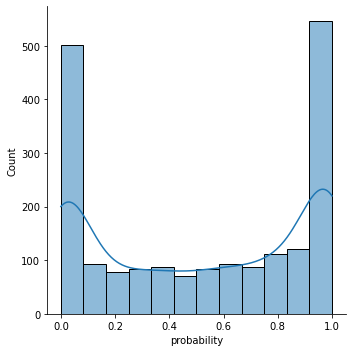

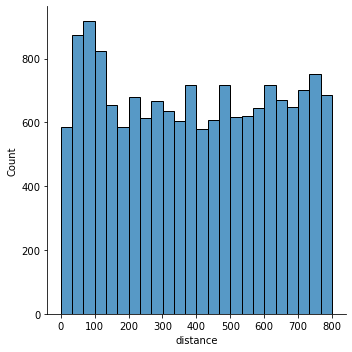

In [6]:

coverage = pd.read_csv("../output/coverage/scenario/mix/150.0/coverages_2009_9_1-2009_11_30.csv")
sns.displot(coverage.probability, kde=True)
print(coverage.describe())
print(coverage["probability"].mean())

dists = pd.read_csv("../output/coverage/subway_dists_dr_800_2009_9_1-2009_11_30.csv")
sns.displot(dists.distance)
print(dists.describe())
print(dists["distance"].quantile(0.5))


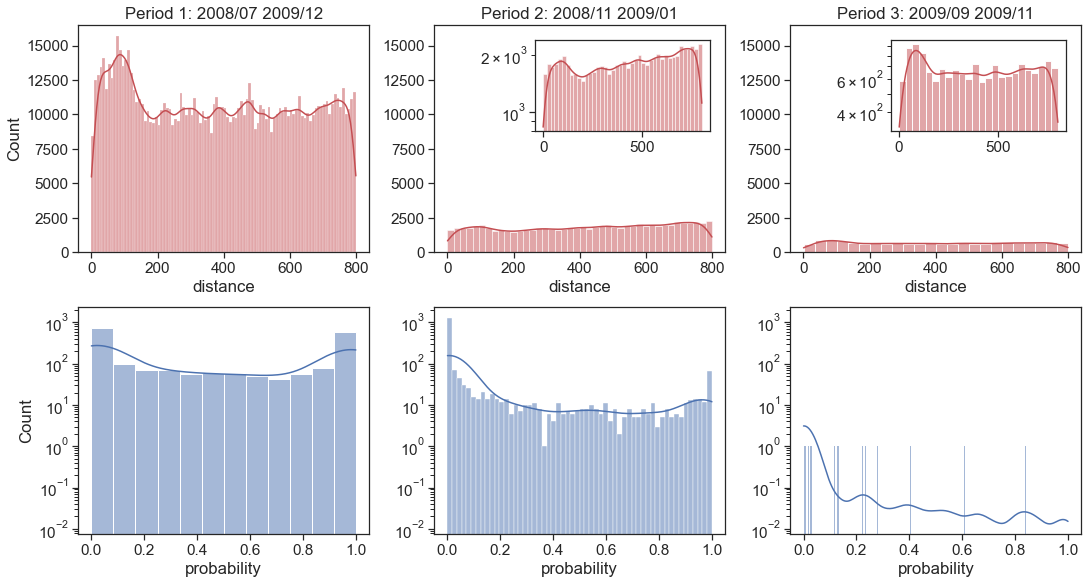

In [2]:
sns.set(style="ticks",font_scale=1.4)
dist1 = pd.read_csv("../output/coverage/subway_dists_dr_800_2008_7_1-2009_12_31.csv")
dist2 = pd.read_csv("../output/coverage/subway_dists_dr_800_2008_11_1-2009_1_31.csv")
dist3 = pd.read_csv("../output/coverage/subway_dists_dr_800_2009_9_1-2009_11_30.csv")

coverage1 = pd.read_csv("../output/coverage/scenario/mix/10.0/coverages_2008_7_1-2009_12_31.csv")
coverage2 = pd.read_csv("../output/coverage/scenario/mix/10.0/coverages_2008_11_1-2009_1_31.csv")
coverage3 = pd.read_csv("../output/coverage/scenario/mix/10.0/coverages_2009_9_1-2009_11_30.csv")


fontsize = 10
fig = plt.figure(constrained_layout=True,figsize=(15, 8))

gs = GridSpec(2, 3, figure=fig)

ax1=fig.add_subplot(gs[0,0])
sns.histplot(dist1.distance, kde=True,ax=ax1,color="r")
ax1.set_title("Period 1: 2008/07 2009/12")


ax2=fig.add_subplot(gs[0,1],sharey=ax1)
sns.histplot(dist2.distance, kde=True,ax=ax2,color="r")
ax2.set_ylabel("")
ax2.set_title("Period 2: 2008/11 2009/01")
axins2 = inset_axes(ax2, width="60%", height="40%", loc=1, borderpad = 1)
sns.histplot(dist2.distance, kde=True,color="r",log_scale=[False,True])
axins2.set_xlabel("")
axins2.set_ylabel("")



ax3=fig.add_subplot(gs[0,2],sharey=ax1)
sns.histplot(dist3.distance, kde=True,ax=ax3,color="r")
ax3.set_ylabel("")
ax3.set_title("Period 3: 2009/09 2009/11")
axins3 = inset_axes(ax3, width="60%", height="40%", loc=1, borderpad = 1)
sns.histplot(dist3.distance, kde=True,color="r",log_scale=[False,True])
axins3.set_xlabel("")
axins3.set_ylabel("")




ax4=fig.add_subplot(gs[1,0])
sns.histplot(coverage1.probability, kde=True,ax=ax4,log_scale=[False,True])


ax5=fig.add_subplot(gs[1,1],sharey=ax4)
sns.histplot(coverage2.probability, kde=True,ax=ax5,log_scale=[False,True])
ax5.set_ylabel("")


ax6=fig.add_subplot(gs[1,2],sharey=ax4)
sns.histplot(coverage3.probability, kde=True,ax=ax6,log_scale=[False,True])
ax6.set_ylabel("")


savefig(conf["out_path"]+"results/distance_coverage.png", dpi  = 300)


